## Objective
- Classifying the image object based on resnet50 model.

Resnet50 is a pretrained cnn(convolutional neural network) with 50 deep layers that can classify images under 1000 categories. Here, we try to implement the model and test it with some images.I used the dataset that contained hot dogs and other food items. I also added few sample images myself for further testing purposes.

### Setup data

In [10]:
import numpy as np
from IPython.display import display
from pprint import pprint

In [2]:
import os

data_dir_hot_dog = 'data/seefood/train/hot_dog'
hot_dog_imgs = ['1046526.jpg', '1104394.jpg', '1161343.jpg', '1190833.jpg', 'carimg.png', 'carimg1.jpeg', 'man.jpg']
hot_dog_imgs_path = [os.path.join(data_dir_hot_dog, elem) for elem in hot_dog_imgs]

data_dir_not_hot_dog = 'data/seefood/train/not_hot_dog'
not_hot_dog_imgs = ['105647.jpg', '106608.jpg', '107013.jpg', '107216.jpg']
not_hot_dog_imgs_path = [os.path.join(data_dir_not_hot_dog, elem) for elem in not_hot_dog_imgs]

data_path = not_hot_dog_imgs_path + hot_dog_imgs_path

resnet_weights_path = 'data/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5'

In [3]:
IMG_WIDTH = IMG_HEIGHT = 224

In [4]:
from IPython.display import Image

# Utility to display image
def display_image(img_path):
    if isinstance(img_path, list):
        for elem in img_path:
            display(Image(elem))
    else:
        display(Image(img_path))
    pass

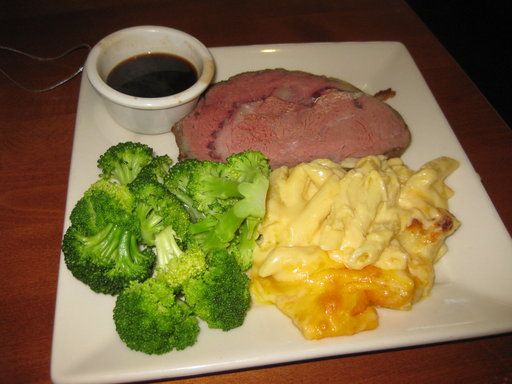

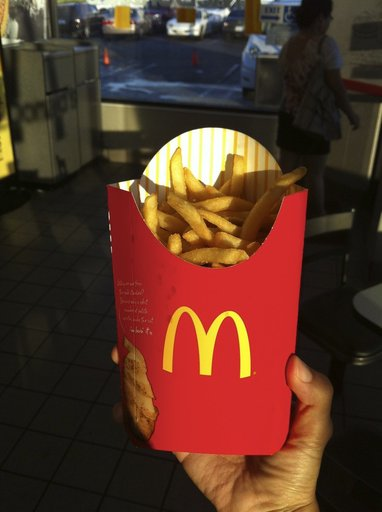

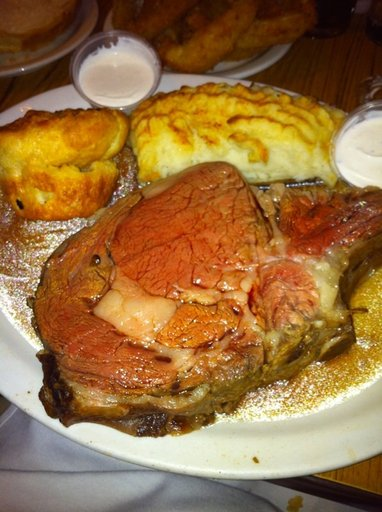

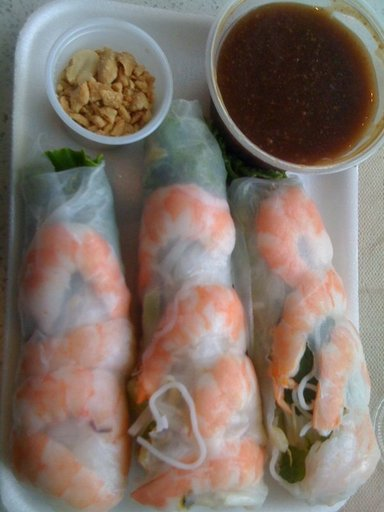

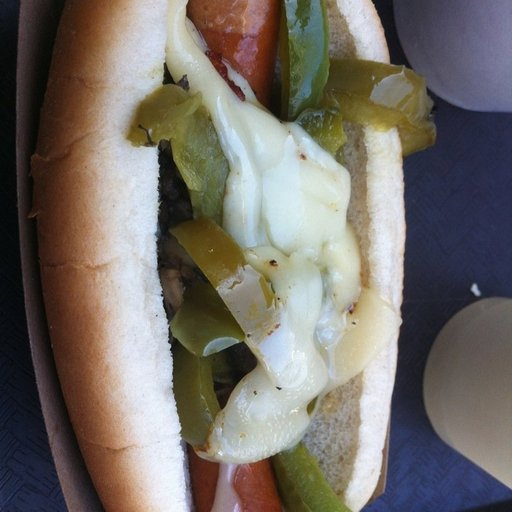

In [16]:
# displaying first few sample test images
no_of_imgs_to_display = 5
display_image(data_path[:no_of_imgs_to_display])

### Preprocessing

In [6]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

def preprocess(imgs_path):
    imgs = [load_img(img, target_size=(IMG_WIDTH, IMG_HEIGHT)) for img in imgs_path] # cropping image with the specified target_size
    imgs_list = np.array([img_to_array(img) for img in imgs])  ## converting rgb image to array(r,g,b) and making a list for each img array, now 4D data(batch_size, width, height, channels)
    normalized = preprocess_input(imgs_list) # caffe style image centering(not from 0 to 1)
    return normalized

In [7]:
# Preprocess to generate test data
data_test = preprocess(data_path)

### Model building and prediction

In [8]:
from tensorflow.python.keras.applications import ResNet50

model = ResNet50(weights=resnet_weights_path)

predicted = model.predict(data_test)

### Visualize the predictions

Using TensorFlow backend.


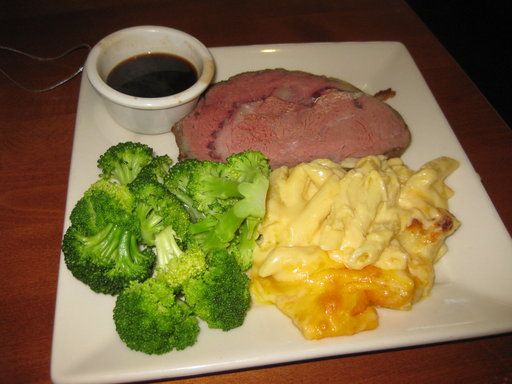

[('n07714990', 'broccoli', 0.4235123),
 ('n07715103', 'cauliflower', 0.4065404),
 ('n07711569', 'mashed_potato', 0.08339015)]


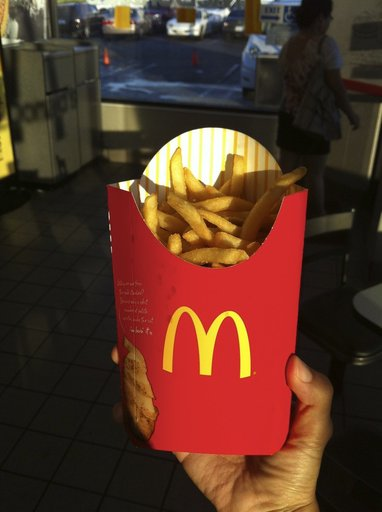

[('n02776631', 'bakery', 0.33208916),
 ('n03590841', "jack-o'-lantern", 0.051364508),
 ('n07695742', 'pretzel', 0.041656822)]


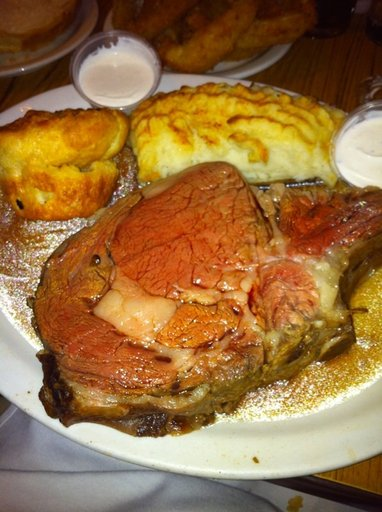

[('n02776631', 'bakery', 0.32236454),
 ('n07579787', 'plate', 0.13965754),
 ('n07875152', 'potpie', 0.12537567)]


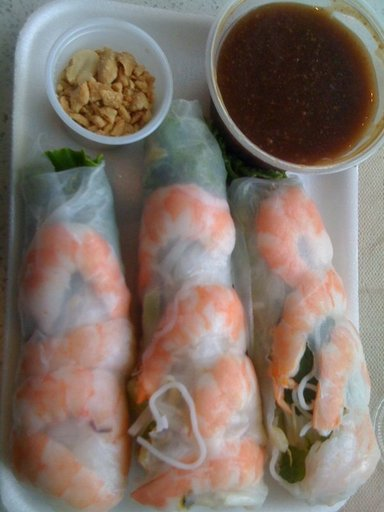

[('n01983481', 'American_lobster', 0.2824111),
 ('n07880968', 'burrito', 0.15837945),
 ('n01981276', 'king_crab', 0.12386223)]


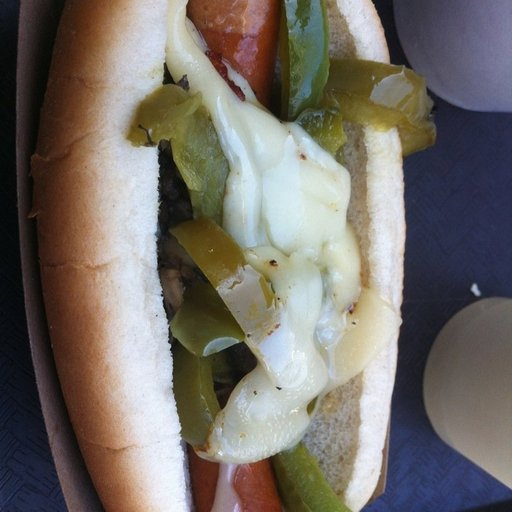

[('n07697537', 'hotdog', 0.998781),
 ('n07697313', 'cheeseburger', 0.0011382384),
 ('n07873807', 'pizza', 2.8469896e-05)]


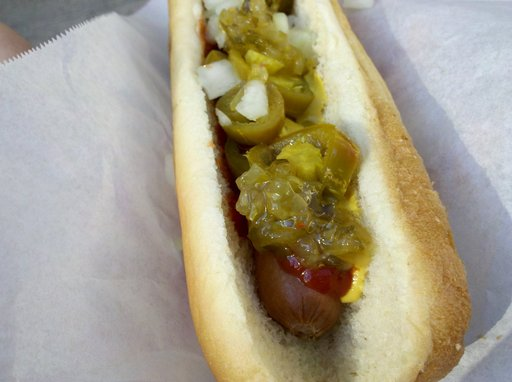

[('n07697537', 'hotdog', 0.9999999),
 ('n07697313', 'cheeseburger', 5.70678e-08),
 ('n07684084', 'French_loaf', 3.342822e-08)]


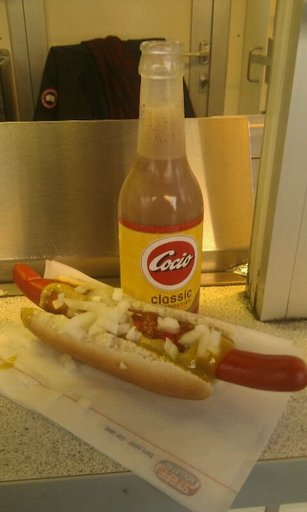

[('n07697537', 'hotdog', 0.9470407),
 ('n07684084', 'French_loaf', 0.010658034),
 ('n07697313', 'cheeseburger', 0.008533699)]


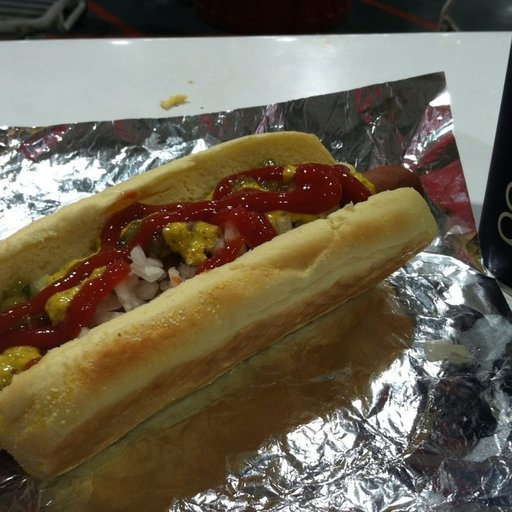

[('n07697537', 'hotdog', 0.9999881),
 ('n07880968', 'burrito', 5.1489474e-06),
 ('n07871810', 'meat_loaf', 2.416992e-06)]


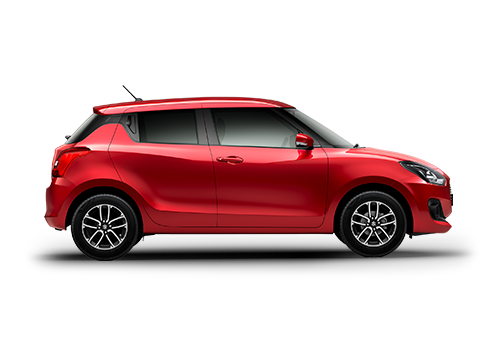

[('n02814533', 'beach_wagon', 0.3294845),
 ('n03100240', 'convertible', 0.30797502),
 ('n03930630', 'pickup', 0.14679801)]


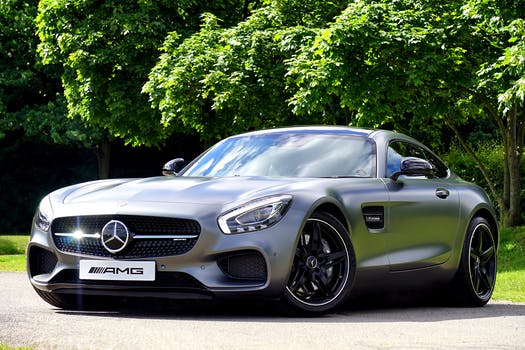

[('n04285008', 'sports_car', 0.50123274),
 ('n03459775', 'grille', 0.26627785),
 ('n03100240', 'convertible', 0.19546029)]


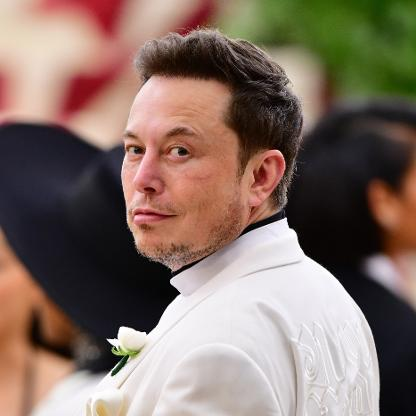

[('n02879718', 'bow', 0.1561902),
 ('n10148035', 'groom', 0.147683),
 ('n04456115', 'torch', 0.11231702)]


In [9]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

top_predictions_each_img = decode_predictions(predicted, top=3) #display top 3 probability scores of predicted images

for i, elem in enumerate(data_path):
    display(Image(elem))
    pprint(top_predictions_each_img[i])

### Conclusion
We used pre-trained model here for the classification. In next iterations we'll build the model and train our own dataset.